# 每月挑选股票

- 初始化

In [107]:
import pandas as pd
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
ts.set_token('6226a7ee6e9cf039a1bcad9d3bc92f1f39c68d51ba2a53965da6dfc6')
pro = ts.pro_api()

In [1]:
have_code = []
with open('have code.txt', 'r') as fin:
    for line in fin:
        have_code = line.split(',')

In [3]:
have_code = ['600004.SH', '600009.SH', '600011.SH', '600027.SH', '600028.SH', '600029.SH', '600031.SH', '600048.SH', '600066.SH', '600068.SH',
             '600085.SH', '600089.SH', '600111.SH', '600115.SH', '600118.SH', '600170.SH', '600176.SH', '600177.SH', '600188.SH', '600196.SH',
             '600208.SH', '600276.SH', '600340.SH', '600352.SH', '600362.SH', '600372.SH', '600383.SH', '600415.SH', '600436.SH', '600489.SH',
             '600519.SH', '600535.SH', '600570.SH', '600583.SH', '600585.SH', '600588.SH', '600660.SH', '600674.SH', '600703.SH', '600809.SH',
             '600867.SH', '600887.SH', '600998.SH', '601006.SH', '601111.SH', '601117.SH', '601186.SH', '601607.SH', '601668.SH', '601808.SH',
             '601857.SH', '601898.SH', '601899.SH', '601933.SH', '000157.SZ', '000338.SZ', '000402.SZ', '000423.SZ', '000425.SZ', '000568.SZ',
             '000596.SZ', '000661.SZ', '000671.SZ', '000725.SZ', '000768.SZ', '000895.SZ', '000898.SZ', '000961.SZ', '002001.SZ', '002007.SZ',
             '002008.SZ', '002024.SZ', '002032.SZ', '002081.SZ', '002146.SZ', '002179.SZ', '002202.SZ', '002236.SZ', '002241.SZ', '002271.SZ',
             '002294.SZ', '002304.SZ', '002311.SZ', '002352.SZ', '002422.SZ', '002456.SZ', '002475.SZ', '002493.SZ', '300015.SZ', '300017.SZ',
             '300024.SZ', '300033.SZ', '300124.SZ']

In [4]:
with open('strtime.txt', 'r') as fin:
    for line in fin:
        strtime = line.split(',')

In [6]:
strtime = ['20110131', '20110228', '20110331', '20110429', '20110531', '20110630', '20110729', '20110831', '20110930', '20111031',
           '20111130', '20111230', '20120131', '20120229', '20120330', '20120427', '20120531', '20120629', '20120731', '20120831', '20120928',
           '20121031', '20121130', '20121231', '20130131', '20130228', '20130329', '20130426', '20130531', '20130628', '20130731', '20130830',
           '20130930', '20131031', '20131129', '20131231', '20140130', '20140228', '20140331', '20140430', '20140530', '20140630', '20140731',
           '20140829', '20140930', '20141031', '20141128', '20141231', '20150130', '20150227', '20150331', '20150430', '20150529', '20150630',
           '20150731', '20150831', '20150930', '20151030', '20151130', '20151231', '20160129', '20160229', '20160331', '20160429', '20160531',
           '20160630', '20160729', '20160831', '20160930', '20161031', '20161130', '20161230', '20170126', '20170228', '20170331', '20170428',
           '20170531', '20170630', '20170731', '20170831', '20170929', '20171031', '20171130', '20171229', '20180131', '20180228', '20180330',
           '20180427', '20180531', '20180629', '20180731', '20180831', '20180928', '20181031', '20181130', '20181228', '20190131', '20190228',
           '20190329', '20190430', '20190531', '20190628', '20190731', '20190830']

In [7]:
with open('strtimes.txt', 'r') as fin:
    for line in fin:
        strtimes = line.split(',')

In [9]:
strtimes = ['20110331', '20110630', '20110930', '20111231', '20120331', '20120630', '20120930', '20121231', '20130331', '20130630',
            '20130930', '20131231', '20140331', '20140630', '20140930', '20141231', '20150331', '20150630', '20150930', '20151231',
            '20160331', '20160630', '20160930', '20161231', '20170331', '20170630', '20170930', '20171231', '20180331', '20180630',
            '20180930', '20181231', '20190331', '20190630']

- 处理季度数据

In [34]:
def get_df():
    '''
    创建一个dataframe用于存储因子数据
    
    输入：无
    
    输出：dataframe对象，共93行，每一行的index都是一只股票
    '''
    # 创建一个空的dataframe
    all_code_factor = pd.DataFrame()
    
    # 创建一个list，共有93个‘1’
    a = ['1' for i in range(93)]
    
    # 将这列数据加入空的dataframe，这样dataframe共有93行1列
    all_code_factor = all_code_factor.append(a)
    
    # 更改dataframe的index，使其为每只股票的代码（带字母）
    all_code_factor.index = have_code
    return all_code_factor

In [59]:
def process_sdata(indicator):
    file = 'f-' + indicator + '.xlsx'
    df = pd.read_excel(file, index_col=0)
    df.columns = strtimes
    
    newdf = get_df()
    
    i = 1
    
    for season in strtimes:
        for j in range(3):
            month = strtime[i]
            newdf[month] = list(df[season])
            i += 1
    
    newfile = 'f-' + indicator + 'm.xlsx'
    newdf.to_excel(newfile)
    
    return newdf

In [ ]:
# 处理季度数据
process_sdata('roe')
process_sdata('roa')
# 已运行

- 因子排名

In [6]:
# 获取因子值
def get_rdata(indicator):
    file = 'f-' + indicator + '.xlsx'
    df = pd.read_excel(file, index_col=0)
    return df

In [7]:
# 获取因子排名
def get_rank(df):
    
    columns = list(df.columns)
    
    for col in columns:
        df[col] = df[col].rank()
        
    return df

In [8]:
# 输出因子排名
def to_file(df, indicator):
    file = 'f-' + indicator + 'r.xlsx'
    df.to_excel(file)

In [9]:
# 处理因子值
def value_to_rank(indicator):
    df = get_rdata(indicator)
    rankdf = get_rank(df)
    to_file(rankdf, indicator)

In [10]:
value_to_rank('ccp ratio')

In [11]:
value_to_rank('roem')

In [12]:
value_to_rank('roam')

In [13]:
value_to_rank('lgmv')

In [14]:
value_to_rank('mmr')

- 收益率排名

In [15]:
# 获取收益率
file = 'historical returns from 2011 to 2019.xlsx'
df = pd.read_excel(file, index_col=0)

# 获取收益率排名
columns = list(df.columns)
for col in columns:
    df[col] = df[col].rank()
        
# 输出收益率排名
newfile = 'f-rr.xlsx'
df.to_excel(newfile)

- 计算rankic的统计量

In [22]:
def describe_rankic(indicator):
    file = 'rankic ' + indicator + '.xlsx'
    df = pd.read_excel(file, index_col=0)
    return df.describe()

- 选股（等权得分法）

In [37]:
def get_df():
    '''
    创建一个dataframe用于存储因子数据
    
    输入：无
    
    输出：dataframe对象，共93行，每一行的index都是一只股票
    '''
    # 创建一个空的dataframe
    all_code_factor = pd.DataFrame()
    
    # 创建一个list，共有93个‘1’
    a = ['1' for i in range(93)]
    
    # 将这列数据加入空的dataframe，这样dataframe共有93行1列
    all_code_factor = all_code_factor.append(a)
    
    # 更改dataframe的index，使其为每只股票的代码（带字母）
    all_code_factor.index = have_code
    return all_code_factor

In [35]:
# 获取所有股票在输入日期的特定因子排名
def get_fr(date, indicator):
    file = 'f-' + indicator + 'r.xlsx'
    df = pd.read_excel(file, index_col=0)
    rank_list = df[date]
    return rank_list

In [52]:
# 获取股票在输入日期的所有因子的等权排名(由小到大，越大越好)
def get_wr(date):
    indicators = ['ccp ratio', 'lgmv', 'mmr', 'roem', 'roam']
    
    rank_all_indicator = get_df()
    
    for indicator in indicators:
        if indicator in ['roem', 'roam']:
            index = strtime.index(date)
            sdate = strtime[index-3]
            rank_list = 94 - get_fr(sdate, indicator)
        else:
            rank_list = get_fr(date, indicator)
        rank_all_indicator[indicator] = rank_list
    
    rank_all_indicator['all'] = 0
    
    for indicator in indicators:
        rank_all_indicator['all'] = rank_all_indicator['all'] + rank_all_indicator[indicator]
    
    return rank_all_indicator['all'].rank()    

In [71]:
# 获取输入日期的选股代码
def get_code(date):
    codes = []
    wr = get_wr(date)
    temp = 0
    for i in range(1, 11):
        code = list(wr[wr.values==i].index)
        if code:
            for c in code:
                codes.append(c)
        else:
            temp += 1
            if temp == 2:
                code = list(wr[wr.values==i-0.5].index)
                for c in code:
                    codes.append(c)
            
    return codes

- 交易

In [79]:
# 获取输入日期所有股票的收盘价
def get_cp(date):
    df = pro.monthly(trade_date=date, fields='ts_code,trade_date,close')
    return df

In [80]:
# 获取指定几种股票的收盘价
def get_scp(codes, df):
    cps = []
    for code in codes:
        ccps = list(df[df['ts_code']==code].loc[:,'close'])
                
        # 若数据不为空，则在list中添加数据
        if ccps:
            ccp = ccps[0]
            cps.append(ccp)
                    
        # 若数据为空，则添加100作为数据缺失的标志（roe不会到100）
        else:
            print('empty error')
            cps.append(0)
            
    return cps

In [87]:
# 在输入日期买入股票，每个100手
def buy(date, money):
    codes = get_code(date)
    
    df = get_cp(date)
    cps = get_scp(codes, df)
    
    for cp in cps:
        money = money - cp * 10000
        
    return money

In [93]:
# 在输入日期卖出持有股票，每个100手
def sell(date, money, codes):
    
    df = get_cp(date)
    cps = get_scp(codes, df)
    
    for cp in cps:
        money = money + cp * 10000
        
    return money

In [21]:
hold_codes = []
money = 0
r = []
for date in strtime[3:]:
    codes = get_code(date)
    print(codes)
    
    money = buy(date, money)
    r.append(money)
    
    if hold_codes:
        money = sell(date, money, codes)
    
    hold_codes = codes

['002032.SZ', '600436.SH', '000661.SZ', '002001.SZ', '600809.SH', '300015.SZ', '600570.SH', '000596.SZ', '002007.SZ', '600111.SH']
['000596.SZ', '600436.SH', '600066.SH', '600352.SH', '600660.SH', '300015.SZ', '600585.SH', '002001.SZ', '000568.SZ', '002493.SZ']
['000596.SZ', '002032.SZ', '600436.SH', '600809.SH', '000661.SZ', '002294.SZ', '601607.SH', '600352.SH', '002007.SZ']
['600066.SH', '600436.SH', '002236.SZ', '000596.SZ', '002294.SZ', '002081.SZ', '600809.SH', '600570.SH', '000661.SZ', '600535.SH']
['000596.SZ', '002236.SZ', '600809.SH', '600436.SH', '600570.SH', '000661.SZ', '002475.SZ', '600004.SH', '002271.SZ', '002146.SZ']
['600436.SH', '600066.SH', '600660.SH', '000596.SZ', '002032.SZ', '600809.SH', '002493.SZ', '002001.SZ', '600998.SH', '600352.SH']
['600340.SH', '600867.SH', '002236.SZ', '002001.SZ', '600436.SH', '002311.SZ', '600066.SH', '002032.SZ', '000661.SZ', '600809.SH']
['600340.SH', '002475.SZ', '600867.SH', '002311.SZ', '002001.SZ', '002032.SZ', '600111.SH', '000

Exception: 抱歉，您每分钟最多访问该接口120次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

In [20]:
# 月收益率
rr = []
for i, m in enumerate(r):
    if i >= 1:
        crr = m / r[i-1] - 1
        rr.append(crr)

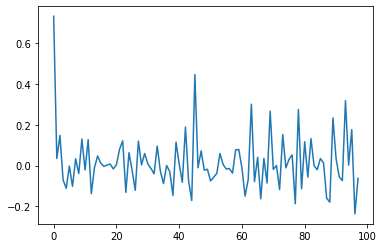

In [122]:
fig, ax = plt.subplots()
x = np.linspace(0, len(rr)-1, len(rr))
y = np.array(rr)
ax.plot(x, y)
plt.show()

In [139]:
# 至今的收益率
ror = []
cror = 1
for cr in rr:
    cror = cror * (1+cr)
    ror.append(cror)

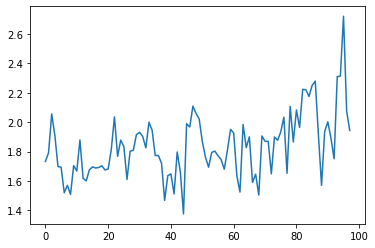

In [140]:
fig, ax = plt.subplots()
x = np.linspace(0, len(ror)-1, len(ror))
y = np.array(ror)
ax.plot(x, y)
plt.show()

- 股票池的收益率

In [129]:
sd = strtime[3]
ed = strtime[-1]

df1 = pro.monthly(trade_date=sd, fields='ts_code,trade_date,close')
df2 = pro.monthly(trade_date=ed, fields='ts_code,trade_date,close')

cps1 = get_scp(have_code, df1)
cps2 = get_scp(have_code, df2)

In [134]:
sum(cps2) / sum(cps1) - 1

0.20813492694756341

In [143]:
money = 0
r = []
for date in strtime[3:]:
    df = pro.monthly(trade_date=date, fields='ts_code,trade_date,close')
    cps = get_scp(have_code, df)
    
    money = sum(cps) * 10000    
    r.append(money)

In [161]:
# 至今的收益率
allror = []
cror = 1
for cr in r:
    cror = cr / r[0]
    allror.append(cror)

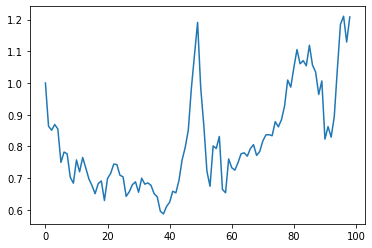

In [162]:
fig, ax = plt.subplots()
x = np.linspace(0, len(allror)-1, len(allror))
y = np.array(allror)
ax.plot(x, y)
plt.show()

- 对比

In [163]:
del allror[0]

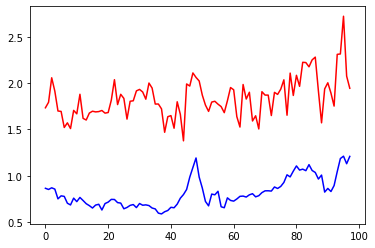

In [164]:
fig, ax = plt.subplots()
x = np.linspace(0, len(allror)-1, len(allror))
y = np.array(allror)
z = np.array(ror)
ax.plot(x, y, 'b-')
ax.plot(x, z, 'r-')
plt.show()